In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cv2.cv as cv
from PIL import Image
from pylab import *
%matplotlib inline

(-0.5, 426.5, 416.5, -0.5)

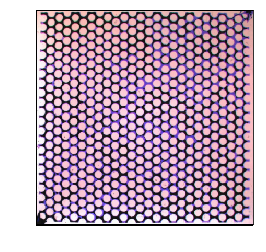

In [12]:
a = cv2.imread('C:/Users/Administrator/Desktop/a.png')
plt.imshow(a)
plt.axis('off')

True

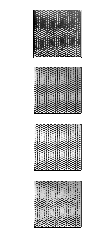

In [14]:
b,g,r=cv2.split(a)
plt.subplot(4,1,1)
t=255-r
plt.imshow(t, cmap="gray")
plt.axis('off')
plt.subplot(4,1,2)
plt.imshow(g, cmap="gray") 
plt.axis('off')
plt.subplot(4,1,3)
plt.imshow(b, cmap="gray")
plt.axis('off')  
plt.subplot(4,1,4)
cv2.imwrite("C:/Users/Administrator/Desktop/t.png",t)
cv2.imwrite("C:/Users/Administrator/Desktop/g.png",g)
cv2.imwrite("C:/Users/Administrator/Desktop/b.png",b)

True

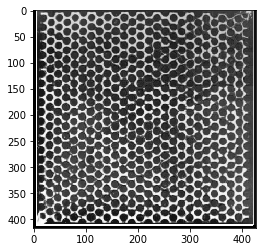

In [34]:
kernel=np.ones((150,150),np.uint8)
s=cv2.morphologyEx(t,cv2.MORPH_TOPHAT,kernel)
added=s+r
s1=cv2.morphologyEx(t,cv2.MORPH_BLACKHAT,kernel)
s2=added-s1
f1=np.power(s2/255.0,0.9)
plt.imshow(f1,'gray')
cv2.imwrite("C:/Users/Administrator/Desktop/s2.png",s2)

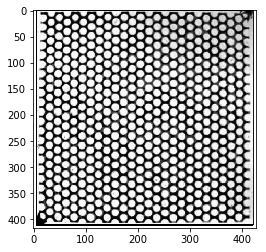

In [134]:
kernel=np.ones((150,150),np.uint8)
s3=cv2.morphologyEx(g,cv2.MORPH_TOPHAT,kernel)
added1=s3+a[:,:,0]
s4=cv2.morphologyEx(g,cv2.MORPH_BLACKHAT,kernel)
s4=added1-s3
f2=np.power(s4/255.0,1.5)
plt.imshow(f2,'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x248b5588>,
 <matplotlib.image.AxesImage at 0x241be6d8>)

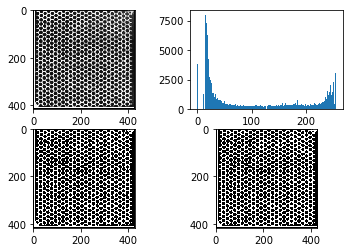

In [135]:
#简单滤波
ret1,th1 = cv2.threshold(s2,127,255,cv2.THRESH_BINARY)
#Otsu 滤波
ret2,th2 = cv2.threshold(s2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure()
plt.subplot(221),plt.imshow(s2,'gray')
plt.subplot(222),plt.hist(s2.ravel(),256)#.ravel方法将矩阵转化为一维
plt.subplot(223),plt.imshow(th1,'gray')
plt.subplot(224),plt.imshow(th2,'gray')#r通道分割出的油相

(<matplotlib.axes._subplots.AxesSubplot at 0x2067b518>,
 <matplotlib.image.AxesImage at 0x2533ff60>)

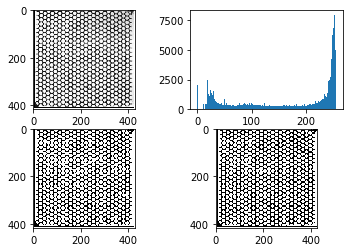

In [136]:
#简单滤波
ret3,th3 = cv2.threshold(s4,127,255,cv2.THRESH_BINARY)
#Otsu 滤波
ret4,th4 = cv2.threshold(s4,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure()
plt.subplot(221),plt.imshow(s4,'gray')
plt.subplot(222),plt.hist(s4.ravel(),256)#.ravel方法将矩阵转化为一维
plt.subplot(223),plt.imshow(th3,'gray')
plt.subplot(224),plt.imshow(th4,'gray')#r通道分割出的油相

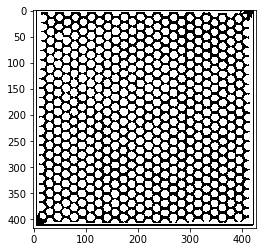

In [138]:
kernel = np.ones((1,1),np.uint8)
erosion1 = cv2.dilate(th4,kernel,1)#对岩石分割结果进行膨胀
erosion2 = cv2.erode(erosion1,kernel,1)#膨胀后腐蚀
plt.imshow(erosion2,'gray')

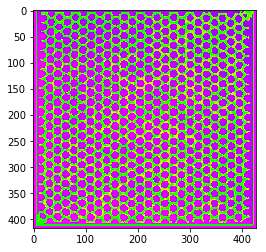

In [143]:
merged1 = cv2.merge([r,r,th4]) #前面分离出来的三个通道合并
plt.imshow(merged1)